Atreish Ramlakhan

Aishwarya Singh

Nosson Weissman

AIM 5001 - Module 8 Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data from GitHub repository: 

In [2]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/atreish/AIM-5001/main/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# remove first column from dataframe so as to not have multiple indices and rename the updated frame 'diamonds1'
diamonds1 = diamonds.drop('Unnamed: 0', axis = 1)
diamonds1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Part 1: Data Summary  
_Explain how many use cases your dataset provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure include any Python code used as part of your Data Summary work._

## Description of Dataset
A dataframe with 53,940 use cases and 10 attributes:

- price: price in US dollars (\\$326 - \\$18,823)

- carat: weight of the diamond (0.2 - 5.01)

- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color: diamond color, from D (best) to J (worst)

- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: length in mm (0 - 10.74)

- y: width in mm (0 - 58.9)

- z: depth in mm (0 - 31.8)

- depth: total depth percentage = $\frac{z}{mean(x, y)} \% = \frac{2z}{(x + y)} \%$ (43 - 79)

- table: width of top of diamond relative to widest point (percentage) (43 - 95)

In [4]:
# print dimensions of dataframe
print("Number of Use Cases: " + str(diamonds1.shape[0]))
print("Number of Attributes: " + str(diamonds1.shape[1]))

Number of Use Cases: 53940
Number of Attributes: 10


In [5]:
# attributes i.e. columns for our dataframe
for i in diamonds1.columns: 
    print(i) 

carat
cut
color
clarity
depth
table
price
x
y
z


In [6]:
diamonds1.dtypes # datatypes for each attribute, also privides list of attributes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
diamonds1.isnull().sum() # check if our variables are missing values, and how many

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Part 2: Exploratory Data Analysis (EDA) 
_Provide summary statistics for each attribute; 
provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings. Be sure include any Python code used as part of your EDA work._

In [8]:
# pd.describe() provides descriptive statistics for each of the numeric variables in our dataframe
diamonds1.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We notice that the min values for the physical dimensions x, y, z are 0. Since diamonds are necessarily 3-dimensional, these may be stand-ins for missing values. We thus find the number of diamond entries with missing values:

In [9]:
len(diamonds1[(diamonds1.x == 0) | (diamonds1.y == 0) | (diamonds1.z == 0)])

20

In [10]:
# full frame of diamonds without missing values
diamonds2 = diamonds1[(diamonds1.x != 0) & (diamonds1.y != 0) & (diamonds1.z != 0)]

diamonds2.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Correlation Matrix for Numeric Attributes:

In [11]:
diamonds2.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


At a glance, we can see that all physical dimensions are highly correlated to one another, and to diamond mass (carats), and to price. Yet the shape dimensions are essentially uncorrelated - 'table' does not correlate with anything, and 'depth' is correlated with the z dimension only because it is a value derived directly from z.

Categorical Attributes overview:

In [12]:
diamonds1.cut.value_counts() # categories of attribute 'cut' present in dataset

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [13]:
diamonds1.color.value_counts() # categories of attribute 'color' present in dataset

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
diamonds1.clarity.value_counts() # categories of attribute 'clarity' present in dataset

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Graphical Analysis Using Matplotlib & Seaborn

#### Carat:
Numeric attribute. We see a general pattern that larger (higher carat) diamonds tend to be rarer in our dataset.

Matplotlib histogram:

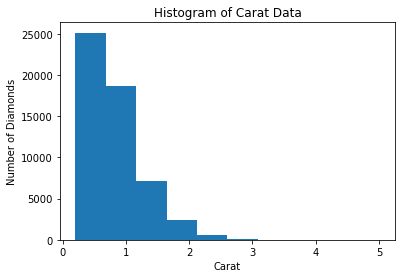

In [15]:
plt.hist(diamonds1.carat, 10)
plt.title('Histogram of Carat Data')
plt.xlabel('Carat')
plt.ylabel('Number of Diamonds')
plt.show()

Seaborn histogram with kernel density estimate (KDE) overlay:

<AxesSubplot:title={'center':'Histogram of Carat Data'}, xlabel='carat', ylabel='Count'>

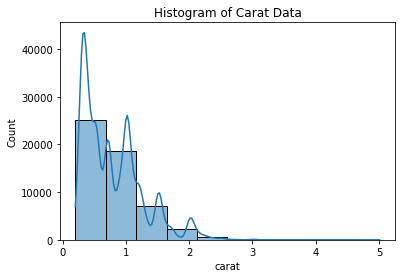

In [16]:
plt.title('Histogram of Carat Data')
sns.histplot(diamonds1.carat, bins = 10, kde = True)

#### Depth:
Numeric attribute. We see that the highest count of diamonds have a depth in the range of 60-64%.

Matplotlib histogram:

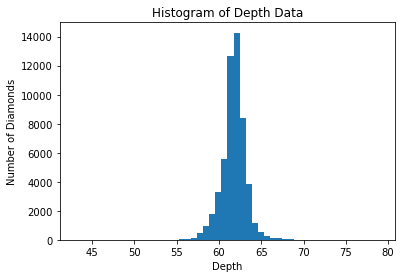

In [17]:
plt.hist(diamonds1.depth, 50)
plt.title('Histogram of Depth Data')
plt.xlabel('Depth')
plt.ylabel('Number of Diamonds')
plt.show()

Seaborn histogram with KDE overlay:

<AxesSubplot:title={'center':'Histogram of Depth Data'}, xlabel='depth', ylabel='Count'>

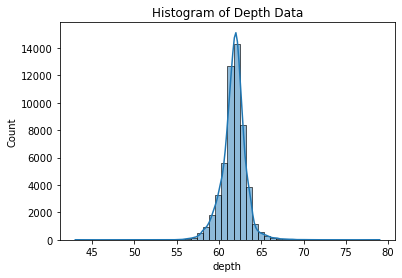

In [18]:
plt.title('Histogram of Depth Data')
sns.histplot(diamonds1.depth, bins = 50, kde = True)

#### Table:
Numeric attribute. We see that the highest count of diamonds have a table in the range of 54-60%.

Matplotlib histogram:

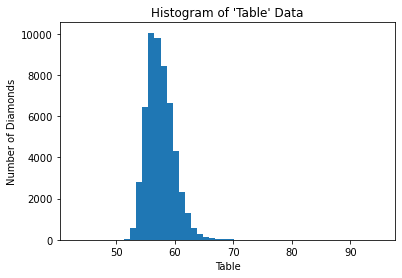

In [19]:
plt.hist(diamonds1.table, 50)
plt.title('''Histogram of 'Table' Data''')
plt.xlabel('Table')
plt.ylabel('Number of Diamonds')
plt.show()

Seaborn histogram with KDE overlay:

<AxesSubplot:title={'center':"Histogram of 'Table' Data"}, xlabel='table', ylabel='Count'>

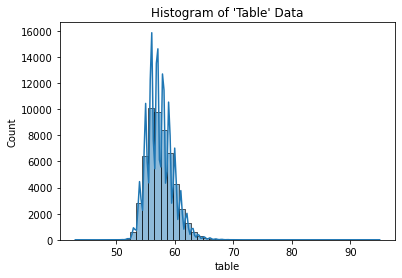

In [20]:
plt.title('''Histogram of 'Table' Data''')
sns.histplot(diamonds1.table, bins = 50, kde = True)

#### Price:
Numeric attribute in units of USD. Most of our diamonds cost less than \\$2,000. More expensive diamonds are seen less frequently.

Matplotlib histogram:

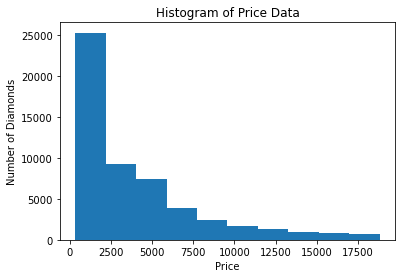

In [21]:
plt.hist(diamonds1.price, 10)
plt.title('Histogram of Price Data')
plt.xlabel('Price')
plt.ylabel('Number of Diamonds')
plt.show()

Seaborn histogram with KDE overlay:

<AxesSubplot:title={'center':'Histogram of Price Data'}, xlabel='price', ylabel='Count'>

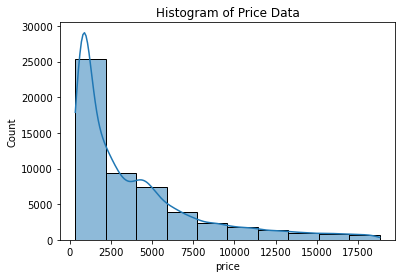

In [22]:
plt.title('Histogram of Price Data')
sns.histplot(diamonds1.price, bins = 10, kde = True)

#### Physical Dimensions:
Numeric attributes in units of mm. The x and y dimensions of our diamonds we notice are generally larger than the z dimension.

Matplotlib histograms:

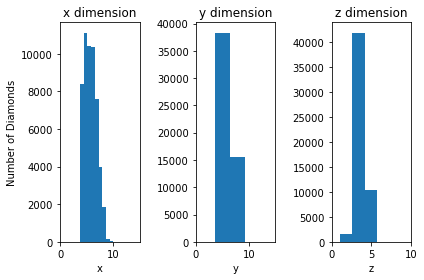

In [23]:
plt.subplot(131)
plt.hist(diamonds2.x, 10)
plt.xlabel('x')
plt.title('x dimension')
plt.ylabel('Number of Diamonds')
plt.xlim((0,15))
plt.subplot(132)
plt.hist(diamonds2.y, 20)
plt.xlabel('y')
plt.title('y dimension')
plt.xlim((0,15))
plt.subplot(133)
plt.hist(diamonds2.z, 20)
plt.xlabel('z')
plt.title('z dimension')
plt.xlim((0,10))
plt.tight_layout()
plt.show()

Seaborn histograms:

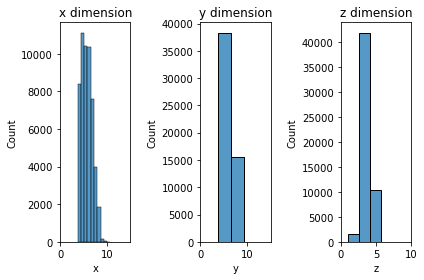

In [24]:
plt.subplot(131)
plt.xlim((0,15))
plt.title('x dimension')
sns.histplot(diamonds2.x, bins = 10)

plt.subplot(132)
plt.xlim((0,15))
plt.title('y dimension')
sns.histplot(diamonds2.y, bins = 20)

plt.subplot(133)
plt.xlim((0,10))
plt.title('z dimension')
sns.histplot(diamonds2.z, bins = 20)

plt.tight_layout()

#### Categorical Attributes:
These are the cut, color and clarity of the diamonds, plotted on bar graphs from best (left) to worst (right). We see that the diamonds in our data tend to be of higher-quality cuts, but color and clarity are mostly mid-range.

Matplotlib graphs:

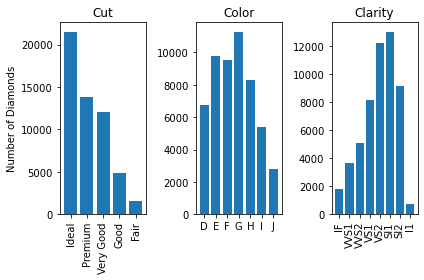

In [25]:
plt.subplot(131)
a = diamonds1.cut.value_counts()
cut_order = ('Ideal','Premium','Very Good','Good','Fair')
plt.title('Cut')
plt.ylabel('Number of Diamonds')
plt.bar(cut_order, a[[cut_order[i] for i in range(len(cut_order))]])
plt.xticks(rotation = 90)

plt.subplot(132)
a = diamonds1.color.value_counts()
color_order = ('D','E','F','G','H','I','J')
plt.title('Color')
plt.bar(color_order, a[[color_order[i] for i in range(len(color_order))]])

plt.subplot(133)
a = diamonds1.clarity.value_counts()
clarity_order = ('IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1')
plt.title('Clarity')
plt.bar(clarity_order, a[[clarity_order[i] for i in range(len(clarity_order))]])
plt.xticks(rotation = 90)

plt.tight_layout()

Seaborn bar graphs:

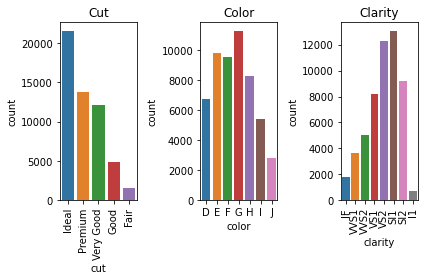

In [26]:
plt.subplot(131)
plt.title('Cut')
sns.countplot(x = 'cut', data = diamonds1, order = cut_order)
plt.xticks(rotation = 90)

plt.subplot(132)
plt.title('Color')
sns.countplot(x = 'color', data = diamonds1, order = color_order)

plt.subplot(133)
plt.title('Clarity')
sns.countplot(x = 'clarity', data = diamonds1, order = clarity_order)
plt.xticks(rotation = 90)

plt.tight_layout()

# Part 3: Inferences

1. _What proportion of diamonds are between .30 and 1.08 carats?_

In [27]:
proportion = len(diamonds1[(diamonds1.carat > 0.30) & (diamonds1.carat < 1.08)]) / len(diamonds1.carat)

print('Proportion between .30 and 1.08 is {:%}'.format(proportion))

Proportion between .30 and 1.08 is 69.399333%


2. _How many of the diamonds have equal x and y dimensions?_

We use our dataframe with missing physical dimension values removed for this problem.

In [28]:
# check column x argument == column y argument boolean and print
xy = diamonds2[ diamonds2.x == diamonds2.y ] 
xy

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
34302,0.32,Ideal,D,VVS2,62.1,54.0,858,4.40,4.40,2.74
40016,0.42,Ideal,H,VVS1,62.8,57.0,1108,4.79,4.79,3.01
41855,0.61,Premium,G,SI1,60.8,60.0,1255,5.42,5.42,3.31
42127,0.48,Ideal,F,VS2,62.4,54.0,1279,5.03,5.03,3.15
43490,0.51,Premium,F,SI1,61.4,59.0,1421,5.13,5.13,3.16


In [29]:
print("Count of diamonds with equal x and y dimensions: " + str(len(xy)))

Count of diamonds with equal x and y dimensions: 10


3. _How many of the diamonds have a carat value that is less than the mean carat value?_

In [30]:
# select all diamonds with carat less than mean using numpy statement
len(diamonds1[diamonds1.carat < np.mean(diamonds1.carat)])

31127

4. _How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal_

In [31]:
 # find the premium and ideal cut diamonds with loc and count them with len
len(diamonds1.loc[diamonds1.cut.isin(('Premium','Ideal'))])

35342

5. _Which diamond has the highest price per carat? What is its value?_

In [32]:
ppc = (diamonds1.price / diamonds1.carat).tolist() # calculate the price per carrot and cast to a list

print(diamonds1.iloc[ppc.index(max(ppc))]) # locate the maximum value in our dataframe and print its attributes

print("\nMaximum Value of Price-per-Carat:", (np.max(ppc))) # use numpy to find max value of our list

carat           1.04
cut        Very Good
color              D
clarity           IF
depth           61.3
table           56.0
price          18542
x               6.53
y               6.55
z               4.01
Name: 27635, dtype: object

Maximum Value of Price-per-Carat: 17828.846153846152


6. _Using both Matplotlib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots._

Matplotlib box plots:

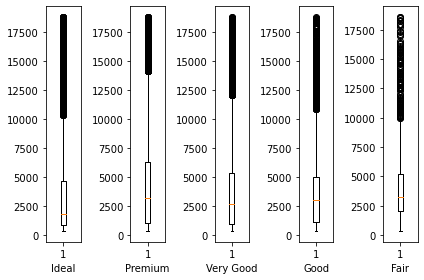

In [33]:
for i in range(len(cut_order)):
    plt.subplot(1, len(cut_order), i+1)
    plt.boxplot(diamonds1.price[ diamonds1.cut == cut_order[i] ])
    plt.xlabel(cut_order[i])

plt.tight_layout()

Seaborn box plot:

<Figure size 864x576 with 0 Axes>

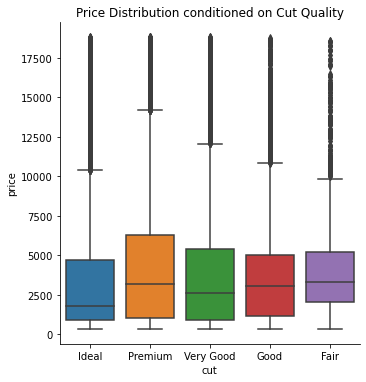

In [34]:
plt.figure(figsize = (12,8))
sns.catplot(x = "cut", y = "price", kind = "box", data = diamonds1, order = cut_order)
plt.title('Price Distribution conditioned on Cut Quality')
plt.show()

Seaborn 'boxen' plot (superior form for large datasets):

<Figure size 864x576 with 0 Axes>

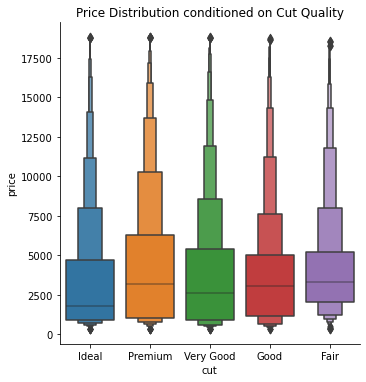

In [35]:
plt.figure(figsize = (12,8))
sns.catplot(x = "cut", y = "price", kind = "boxen", data = diamonds1, order = cut_order)
plt.title('Price Distribution conditioned on Cut Quality')
plt.show()

We see that 'Premium' cut diamonds do seem to command higher prices than inferior cuts, but more interestingly, they also command higher prices than the supposedly better 'Ideal' cut. Overall it appears that cut quality on its own does not significantly dictate price.

7. _Using both Matplotlib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?_

Matplotlib scatter plot:

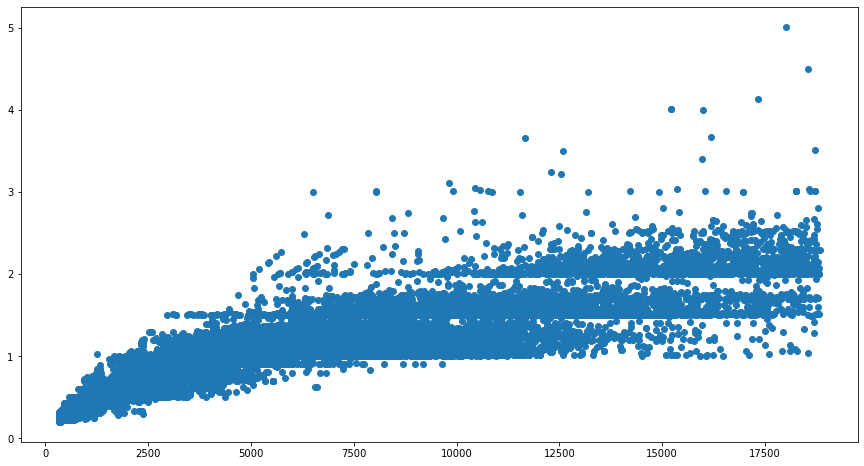

In [36]:
plt.figure(figsize = (15,8))
plt.scatter(x = diamonds1.price, y = diamonds1.carat)
plt.show()

Seaborn scatter plot:

<AxesSubplot:xlabel='price', ylabel='carat'>

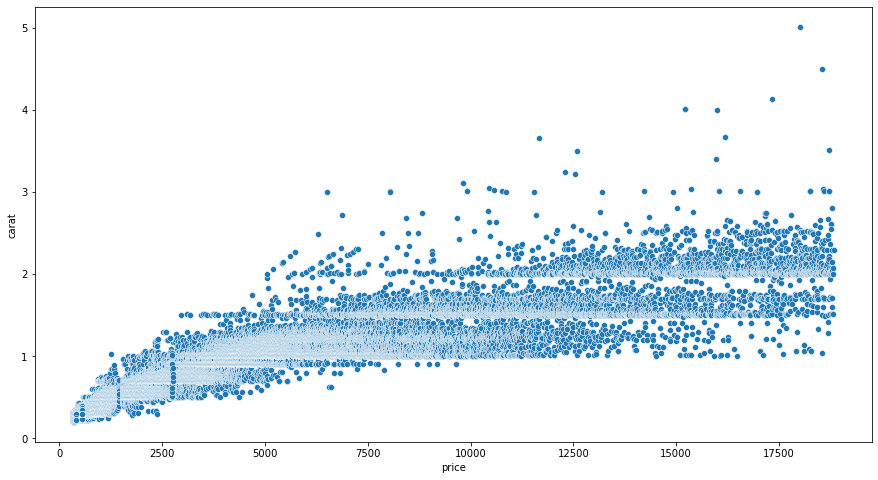

In [37]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'price', y = 'carat', data = diamonds1)

Seaborn scatter plot with a regression line present:

<AxesSubplot:xlabel='price', ylabel='carat'>

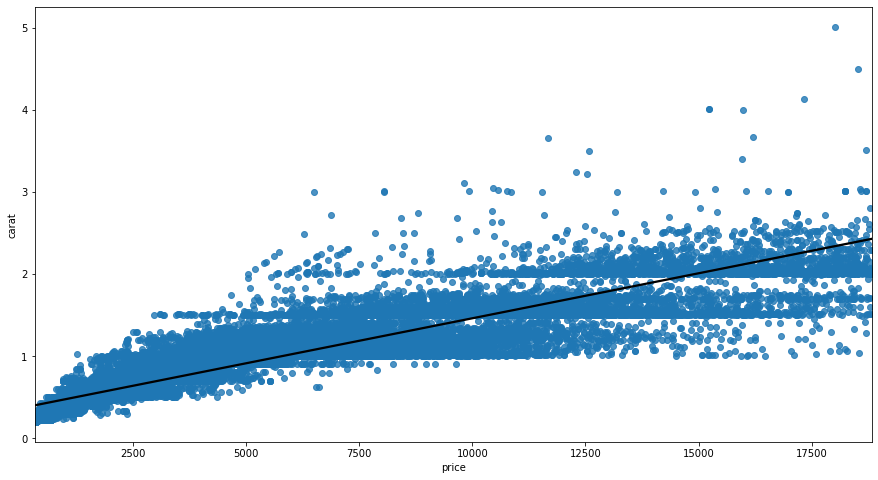

In [38]:
plt.figure(figsize = (15,8))
sns.regplot(x = 'price', y = 'carat', data = diamonds1, line_kws = {"color": "black"})

There is certainly a linear relationship between a diamond's carat and price. The higher the carat, the higher the price in general. We note that the majority of the plot density is at carat values of 2 or lower, and there are vanishingly few examples of diamonds above 3 carats. The vast majority of diamonds with prices over \\$7,500 are still below 3 carats, and there are many examples of higher priced 1-to-2 carrot diamonds costing over \\$7,500.

In [39]:
# using previous question
lessthan3 = len(diamonds1[(diamonds1.carat <= 3)]) / len(diamonds1.carat)
print('Percent of Diamonds of Less than / Equal to 3 carats: {:%}'.format(lessthan3))

Percent of Diamonds of Less than / Equal to 3 carats: 99.940675%


In [40]:
lessthan2 = len(diamonds1[(diamonds1.carat <= 2)]) / len(diamonds1.carat)
print('Percent of Diamonds of Less than / Equal to 2 carats: {:%}'.format(lessthan2))

Percent of Diamonds of Less than / Equal to 2 carats: 96.497961%


In [41]:
lessthan1 = len(diamonds1[(diamonds1.carat <= 1)]) / len(diamonds1.carat)
print('Percent of Diamonds of Less than / Equal to 1 carat: {:%}'.format(lessthan1))

Percent of Diamonds of Less than / Equal to 1 carat: 67.552836%


# Part 4: Conclusion

This dataset gives us great information for nearly 54,000 unique diamonds. The vast majority (over 67.55%) are small, less than or equal to 1 carat, and this percentage goes up to over 96.49% for masses below 2 carats. There exists only a small group of large diamonds above 2 carats.

Diamonds are expensive, and there is an approximately linear increase in price for a given increase in carats. The correlations we see tell a simple story: diamonds with larger physical dimensions (x, y, z in mm) are more massive (in carats) and command higher prices (in USD). Yet there are outliers: the maximum price-per-carat is seen for a specimen that is just 1.04 carats in mass, but costs \\$17,828 per carat.

One of the categorical ordinal attributes by which diamond are classified is the quality of their 'cut', labeled as Fair < Good < Very Good < Premium < Ideal. Our analysis indicates that the distribution of diamonds in our dataset sees higher counts at better cut qualities - there are actually many more 'ideal' cut diamonds than mere 'fair' ones. However, cut quality does not have a clearly proportional relation to price - a diamond having an 'ideal' cut does not necessarily indicate that it will be more expensive than a 'premium' cut.

Finally, it's safe to say that diamond prices are remarkably variable, despite any patterns regarding their size or quality. A consumer can purchase a ~1 carat diamond from as little as a few hundred dollars, to as much as \\$18,000!

# References

- https://ggplot2.tidyverse.org/reference/diamonds.html

- https://raw.githubusercontent.com/atreish/AIM-5001/main/diamonds.csv